In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('data.csv',error_bad_lines=False)
data.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_18340\2851689171.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('data.csv',error_bad_lines=False)
b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


0 means: the password’s strength is weak;
1 means: the password’s strength is medium;
2 means: the password’s strength is strong;

In [3]:
data = data.dropna()

In [4]:
data['strength'] = data['strength'].map({0:"Weak",1:"Medium",2:"Strong"})

C:\Users\hp\AppData\Local\Temp\ipykernel_18340\4106690623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['strength'] = data['strength'].map({0:"Weak",1:"Medium",2:"Strong"})


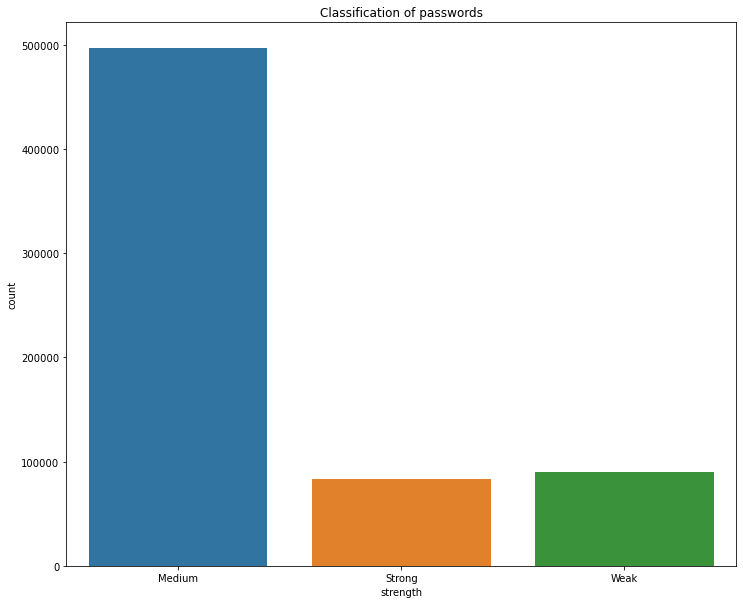

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.countplot(x=data['strength'])
plt.title("Classification of passwords")
plt.show()

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

def word(password):
    char = []
    for i in password:
        char.append(i)
    return char

x = np.array(data["password"])
y = np.array(data["strength"])

tfid = TfidfVectorizer(tokenizer=word)
x = tfid.fit_transform(x)

In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [12]:
model.score(xtest,ytest)

0.9264007526432113

In [14]:
usrpwd = "D4R1US!T4NZ@6969"
data = tfid.transform([usrpwd]).toarray()
pwd_strength = model.predict(data)

In [15]:
pwd_strength

array(['Strong'], dtype=object)

In [16]:
import pickle
pickle.dump(model,open('password_strength_detection.pkl','wb'))